In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key2

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-89.7611254445146 -115.12820529319572
2.176323019056724 7.874220123134677
-83.85143312399815 10.889482127599791
55.20148437200024 -108.44359998502215
46.18265352344142 -50.55398013247935
-3.388998410096704 102.61929204414247
25.634787949935202 -74.87373552796707
72.34602961732634 20.058683901388946
40.98715713169986 109.2688290459796
-61.217684228875505 -133.40840680529857
-88.54587261741321 -16.214199137271464
-69.58757473271652 133.39001570122906
-83.8661717838408 -123.12717383833808
26.461810025062377 -61.24699143512663
88.20740780879808 -143.2733951851833
-79.46359167288855 -69.45710234990774
-81.83628519145333 178.11941430119538
59.28287771463772 -31.133926147631
2.6877174096140948 -128.3377358849881
23.475699806434093 -42.25376200676263
16.372538893453182 -114.23638797702473
35.89346378478217 128.19858806981466
37.72287508754687 0.0761332458773154
-54.00931335139012 17.310985632926815
-53.306693419052515 -159.11541748181358
14.11988804117135 -9.84421432821972
14.496734344105889 1

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [9]:
#set common variable to match class text.
weather_api_key = weather_api_key2

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | luba
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | meadow lake
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | curup
Processing Record 7 of Set 1 | rock sound
Processing Record 8 of Set 1 | skjervoy
Processing Record 9 of Set 1 | dongsheng
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | seoul
Processing Record 21 of Set 1 | santa pola
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | mataura
Processing Record 24 of Set 1 | bafoulabe
Processin

Processing Record 39 of Set 4 | lucea
Processing Record 40 of Set 4 | igrim
Processing Record 41 of Set 4 | boende
Processing Record 42 of Set 4 | balimo
City not found. Skipping...
Processing Record 43 of Set 4 | celestun
Processing Record 44 of Set 4 | marystown
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | henties bay
Processing Record 48 of Set 4 | pafos
Processing Record 49 of Set 4 | piltene
Processing Record 50 of Set 4 | goure
Processing Record 1 of Set 5 | half moon bay
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | berlevag
Processing Record 5 of Set 5 | kamenka
Processing Record 6 of Set 5 | selu
Processing Record 7 of Set 5 | sandviken
Processing Record 8 of Set 5 | fairbanks
Processing Record 9 of Set 5 | jurado
Processing Record 10 of Set 5 | royan
Processing Record 11 of Set 5 | zarubino
Processing Record 12 of Set 5 | kumano
Proc

Processing Record 26 of Set 8 | entre rios
Processing Record 27 of Set 8 | cabra
Processing Record 28 of Set 8 | keti bandar
Processing Record 29 of Set 8 | jozefow
Processing Record 30 of Set 8 | alexandria
Processing Record 31 of Set 8 | lebanon
Processing Record 32 of Set 8 | salinas
Processing Record 33 of Set 8 | nemuro
Processing Record 34 of Set 8 | rungata
City not found. Skipping...
Processing Record 35 of Set 8 | san pedro
Processing Record 36 of Set 8 | port-gentil
Processing Record 37 of Set 8 | matola
Processing Record 38 of Set 8 | dwarka
Processing Record 39 of Set 8 | sainte-anne-des-monts
Processing Record 40 of Set 8 | comodoro rivadavia
Processing Record 41 of Set 8 | chicama
Processing Record 42 of Set 8 | oranjemund
Processing Record 43 of Set 8 | tuatapere
Processing Record 44 of Set 8 | belaya gora
Processing Record 45 of Set 8 | urumqi
Processing Record 46 of Set 8 | yakeshi
Processing Record 47 of Set 8 | pevek
Processing Record 48 of Set 8 | howick
Processing 

Processing Record 13 of Set 12 | corsicana
Processing Record 14 of Set 12 | grand island
Processing Record 15 of Set 12 | pedra
Processing Record 16 of Set 12 | bad doberan
Processing Record 17 of Set 12 | bektemir
Processing Record 18 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 19 of Set 12 | nyurba
Processing Record 20 of Set 12 | palafrugell
Processing Record 21 of Set 12 | puerto baquerizo moreno
Processing Record 22 of Set 12 | nichinan
Processing Record 23 of Set 12 | alotau
City not found. Skipping...
Processing Record 24 of Set 12 | nanortalik
Processing Record 25 of Set 12 | talnakh
Processing Record 26 of Set 12 | haibowan
City not found. Skipping...
Processing Record 27 of Set 12 | bac giang
Processing Record 28 of Set 12 | rorvik
Processing Record 29 of Set 12 | cayenne
Processing Record 30 of Set 12 | nandura
Processing Record 31 of Set 12 | aripuana
Processing Record 32 of Set 12 | bogovarovo
Processing Record 33 of Set 12 | ishcherskaya
Processing Record 34 o

In [13]:
len(city_data)

577

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,51.91,87,0,2.30,CL,2023-01-20 05:57:06
1,Luba,3.4568,8.5547,79.83,84,81,5.19,GQ,2023-01-20 05:57:06
2,Hermanus,-34.4187,19.2345,72.81,74,0,0.92,ZA,2023-01-20 05:57:07
3,Meadow Lake,34.8014,-106.5436,36.61,45,88,4.25,US,2023-01-20 05:57:07
4,Torbay,47.6666,-52.7314,33.58,93,100,12.66,CA,2023-01-20 05:57:08
5,Curup,-3.4667,102.5333,75.56,88,100,1.48,ID,2023-01-20 05:57:08
6,Rock Sound,24.9000,-76.2000,76.69,55,92,7.34,BS,2023-01-20 05:57:08
7,Skjervoy,70.0311,20.9714,28.40,65,97,11.39,NO,2023-01-20 05:57:09
8,Dongsheng,39.8161,109.9776,17.85,46,0,16.28,CN,2023-01-20 05:57:09
9,Rikitea,-23.1203,-134.9692,77.97,68,68,3.29,PF,2023-01-20 05:57:09


In [19]:
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2023-01-20 05:57:06,-53.1500,-70.9167,51.91,87,0,2.30
1,Luba,GQ,2023-01-20 05:57:06,3.4568,8.5547,79.83,84,81,5.19
2,Hermanus,ZA,2023-01-20 05:57:07,-34.4187,19.2345,72.81,74,0,0.92
3,Meadow Lake,US,2023-01-20 05:57:07,34.8014,-106.5436,36.61,45,88,4.25
4,Torbay,CA,2023-01-20 05:57:08,47.6666,-52.7314,33.58,93,100,12.66
5,Curup,ID,2023-01-20 05:57:08,-3.4667,102.5333,75.56,88,100,1.48
6,Rock Sound,BS,2023-01-20 05:57:08,24.9000,-76.2000,76.69,55,92,7.34
7,Skjervoy,NO,2023-01-20 05:57:09,70.0311,20.9714,28.40,65,97,11.39
8,Dongsheng,CN,2023-01-20 05:57:09,39.8161,109.9776,17.85,46,0,16.28
9,Rikitea,PF,2023-01-20 05:57:09,-23.1203,-134.9692,77.97,68,68,3.29


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

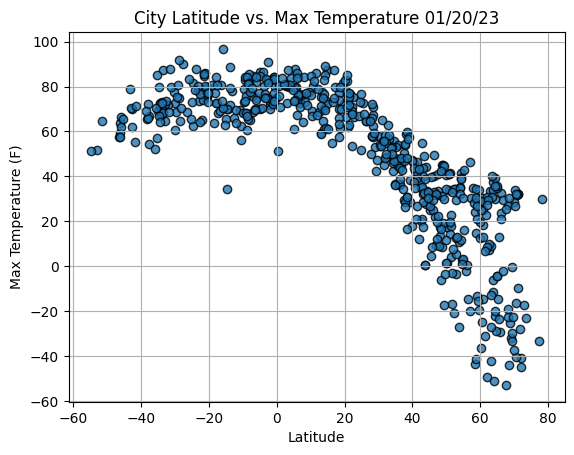

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

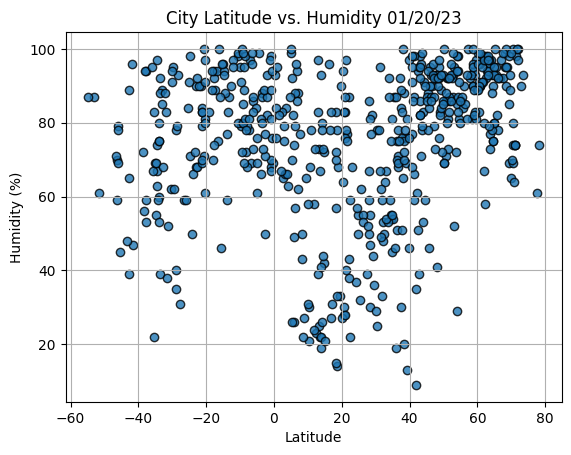

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

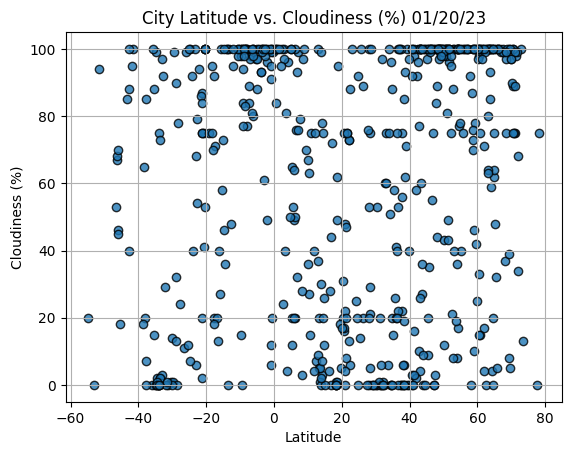

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

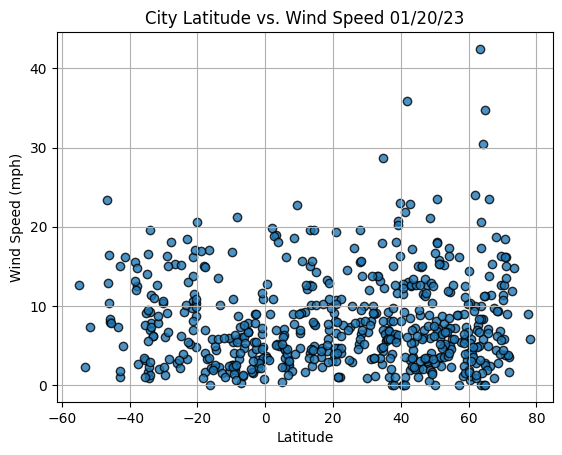

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()